In [79]:
import pickle
import networkx as nx
import pandas as pd
import urllib
# z = pickle.load(open('./string_alignment.pkl', 'rb'))
from urllib.parse import urlparse

text_to_outlet = {}
outlet_info = {}
domain_info = {}
outlet_to_collection = {}
prefixes = ['california', 'florida', 'illinois', 'ohio', 'newyork', 'nytimes_foxnews', 'texas',]
for prefix in prefixes:
    try:
        df = pd.read_csv('../data_csvs/' + prefix + '_article_texts_and_info_dedup_without_national_outlets.csv')
        print([c for c in df.columns])
        for idx, row in df.iterrows():
            outlet_info[row['media_name']] = prefix
            domain = urlparse(row['url']).netloc
            domain_info[domain] = prefix
            domain_info[row['media_name']] = prefix
            if row['url'] in text_to_outlet:
                text_to_outlet[row['url']] = text_to_outlet[row['url']] + [domain]
            else:
                text_to_outlet[row['url']] = [domain]
    except FileNotFoundError:
        df = pd.read_csv('../data_csvs/' + prefix + '_article_texts_and_info_dedup.csv')
        for idx, row in df.iterrows():
            outlet_info[row['media_name']] = row['media_name']
            domain = urlparse(row['url']).netloc
            domain_info[domain] = row['media_name']
            if row['url'] in text_to_outlet:
                text_to_outlet[row['url']] = text_to_outlet[row['url']] + [row['media_name']]
            else:
                text_to_outlet[row['url']] = [row['media_name']]
    

['Unnamed: 0', 'media_name', 'publish_date', 'title', 'url', 'subtitle', 'text', 'sent_count', 'domain']
['Unnamed: 0', 'media_name', 'publish_date', 'title', 'url', 'subtitle', 'text', 'sent_count', 'domain']
['Unnamed: 0', 'media_name', 'publish_date', 'title', 'url', 'subtitle', 'text', 'sent_count', 'domain']
['Unnamed: 0', 'media_name', 'publish_date', 'title', 'url', 'subtitle', 'text', 'sent_count', 'domain']
['Unnamed: 0', 'media_name', 'publish_date', 'title', 'url', 'subtitle', 'text', 'sent_count', 'domain']
['Unnamed: 0', 'media_name', 'publish_date', 'title', 'url', 'subtitle', 'text', 'sent_count', 'domain']


In [3]:
z = pickle.load(open('./new_string_alignment_150.pkl', 'rb'))

In [58]:
text_to_outlet

{'https://feeds.feedblitz.com/~/733410173/0/cbs8/news~San-Diegans-fighting-for-transgender-rights-amid-nationwide-backlash': ['feeds.feedblitz.com'],
 'https://www.mantecabulletin.com/sports/high-school-sports/ripons-jaydin-kroutil-is-tvl-mvp/': ['www.mantecabulletin.com'],
 'http://www.santamariasun.com/cover/21871/solvang-residents-say-pride-banners-promote-politics-and-exclusivity-while-lgbtqplus-community-members-say-they-promote-acceptance-and-inclusion/': ['www.santamariasun.com'],
 'http://www.santamariasun.com/news/21875/ballard-transgender-students-announcement-leads-to-district-policy-discussions/': ['www.santamariasun.com'],
 'https://www.presstelegram.com/2023/04/01/long-beach-transit-plans-for-a-greener-future-during-60th-anniversary-celebration/': ['www.presstelegram.com'],
 'https://www.record-bee.com/2023/04/01/murder-and-war-begin-with-dehumanization/': ['www.record-bee.com'],
 'https://kesq.com/news/national-politics/cnn-us-politics/2023/04/01/abortion-foes-take-aim-a

In [80]:
G = nx.Graph()

# for txt, outlets in text_to_outlet.items():
#     if len(outlets) > 1:
#         for outlet1 in list(set(outlets)):
#             for outlet2 in list(set(outlets)):
#                 if outlet1 != outlet2:
#                     G.add_edge(outlet1, outlet2, dist_list=[150])
                    
for k, v in z.items():
    for kv, vv in v.items():
        if vv < 151:
            if vv == -1:
                continue
            else:
                try:
                    outlets1 = [k[0]]
                except KeyError:
                    continue
                try:
                    outlets2 = [kv[0]]
                except KeyError:
                    continue
                for outlet1 in outlets1:
                    for outlet2 in outlets2:
                        if outlet1 == outlet2:
                            continue
                        if outlet1 == 'Fox News':
                            print(outlet1, outlet2)
                        data = G.get_edge_data(outlet1, outlet2, default={'dist_list': []})['dist_list']
                        
                        if data == []:
                            G.add_edge(outlet1, outlet2, dist_list=[vv])
                        else:
                            G.edges[outlet1, outlet2].update({'dist_list': data + [vv]})

In [78]:
print([n for n in G.edges])

[('wkbn.com', 'wfla.com'), ('wkbn.com', 'KTSM'), ('wkbn.com', 'mystateline.com'), ('wkbn.com', 'baynews9.com'), ('wkbn.com', 'The Daily Breeze'), ('wkbn.com', 'kesq.com'), ('wkbn.com', 'kion546.com'), ('wkbn.com', 'kxas nbc 5'), ('wkbn.com', 'Syracuse.com'), ('wkbn.com', 'http://www.hoffmania.com/'), ('wkbn.com', 'myhighplains.com'), ('wkbn.com', 'yourcentralvalley.com'), ('wkbn.com', 'WWTI'), ('wkbn.com', 'watermarkonline.com'), ('wkbn.com', 'New York News - NY News | The Daily Freeman'), ('wkbn.com', 'keyt.com'), ('wkbn.com', 'WSVN FOX'), ('wkbn.com', 'kron4.com'), ('wkbn.com', 'ktsa.com'), ('wkbn.com', 'Hoffman Estates Review'), ('wkbn.com', 'KGET'), ('wkbn.com', 'wgntv.com'), ('wkbn.com', 'Newsday'), ('wkbn.com', 'Brunswick Sun'), ('wkbn.com', 'AuburnPub'), ('wkbn.com', 'ktla.com'), ('wkbn.com', 'kxan.com'), ('wkbn.com', 'news10.com'), ('wkbn.com', 'bigcountryhomepage.com'), ('wkbn.com', 'cltv.com'), ('wkbn.com', 'wdtn.com'), ('wfla.com', 'Ohio News Network'), ('wfla.com', 'fox8.co

In [81]:
ca = nx.subgraph_view(
    G, lambda b: domain_info.get(b, domain_info.get('www.' + b, None)) in set(
        ['california', 'New York Times', 'Fox News'])
)
oh = nx.subgraph_view(
    G, lambda b: domain_info.get(b, domain_info.get('www.' + b, None)) in set(
        ['ohio', 'New York Times', 'Fox News'])
)
il = nx.subgraph_view(
    G, lambda b: domain_info.get(b, domain_info.get('www.' + b, None)) in set(
        ['illinois', 'New York Times', 'Fox News'])
) 
fl = nx.subgraph_view(
    G, lambda b: domain_info.get(b, domain_info.get('www.' + b, None)) in set(
        ['florida', 'New York Times', 'Fox News'])
)
ny = nx.subgraph_view(
    G, lambda b: domain_info.get(b, domain_info.get('www.' + b, None)) in set(
        ['newyork', 'New York Times', 'Fox News'])
)
tx = nx.subgraph_view(
    G, lambda b: domain_info.get(b, domain_info.get('www.' + b, None)) in set(
        ['texas', 'New York Times', 'Fox News'])
)

In [ ]:
S = nx.subgraph_view(
    G, lambda b: domain_info.get(b, domain_info.get('www.' + b, None)) in set(
        ['texas', 'california', 'newyork', ''])
)

In [87]:
import numpy as np
H = ca
for e in H.edges:
    print(e)
    dist = H.get_edge_data(e[0], e[1])['dist_list']
    H.edges[e[0], e[1]].update({'weight': 150 - np.mean(dist)})
    H.edges[e].update({'dist_list': 0})
    
for node in H.nodes:
    H.nodes[node].update({'dset': outlet_info[node]})
nx.write_gexf(H, "ny_similarity_nyt_fox.gexf")

('The Daily Breeze', 'kion546.com')
('The Daily Breeze', 'El Cerrito Journal')
('kcra.com', 'ksbw.com')
('kesq.com', 'http://www.hoffmania.com/')
('kesq.com', 'keyt.com')
('kesq.com', 'kion546.com')
('kesq.com', 'kron4.com')
('kesq.com', 'northbaybusinessjournal.com')
('kesq.com', 'kmir.com')
('kesq.com', 'ktla.com')
('kion546.com', 'keyt.com')
('kion546.com', 'http://www.hoffmania.com/')
('http://www.hoffmania.com/', 'LA Times')
('yourcentralvalley.com', 'KGET')
('keyt.com', 'ktla.com')
('kron4.com', 'ktla.com')
('kron4.com', 'sanfrancisco.cbslocal.com')
('ktla.com', 'El Cerrito Journal')
('ktla.com', 'sanfrancisco.cbslocal.com')
('sanfrancisco.cbslocal.com', 'gooddaysacramento.cbslocal.com')
('San Diego Voice and Viewpoint', 'Inland Valley News')
('nbcbayarea.com', 'nbclosangeles.com')
('nbcbayarea.com', 'nbcsandiego.com')
('nbcsandiego.com', 'nbclosangeles.com')
('www.record-bee.com', 'Ukiah Daily Journal')
('| www.theacornonline.com | The Acorn Online - In Print and on the Web', 'm

In [51]:
nx.write_gexf(G, "outlet_similarity_not_messed_up.gexf")

In [64]:
pickle.dump(G, open('outlet_similarity_not_messed_up.pkl', 'wb'))

In [52]:
prefixes_new = ['california', 'florida', 'illinois', 'ohio', 'newyork', 'texas', 'New York Times', 'Fox News', ]
collection_edges = {prefix1: {prefix2: [] for prefix2 in prefixes_new} for prefix1 in prefixes_new}
for edge in G.edges:
    print(G.get_edge_data(edge[0], edge[1])['dist_list'])
    print(outlet_info[edge[0]])
    print(outlet_info[edge[1]])
    print(collection_edges[outlet_info[edge[0]]][outlet_info[edge[1]]])
    dist_list = G.get_edge_data(edge[0], edge[1])['dist_list']
    if type(dist_list) != list:
        dist_list = [dist_list]
    collection_edges[outlet_info[edge[0]]][outlet_info[edge[1]]] += dist_list
    

0
New York Times
california
[]
0
New York Times
california
[0]
0
New York Times
california
[0, 0]
0
New York Times
texas
[]
0
florida
ohio
[]
0
florida
newyork
[]
0
florida
california
[]
0
florida
california
[0]
0
ohio
newyork
[]
0
ohio
california
[]
0
ohio
florida
[]
0
ohio
california
[0]
0
newyork
california
[]
0
newyork
florida
[]
0
newyork
california
[0]
0
california
florida
[]
0
california
california
[]
0
california
texas
[]
0
california
texas
[0]
0
california
florida
[0]
0
california
ohio
[]
0
california
newyork
[]
0
california
florida
[0, 0]
0
california
texas
[0, 0]
0
california
texas
[0, 0, 0]
0
california
texas
[0, 0, 0, 0]
0
california
texas
[0, 0, 0, 0, 0]
0
california
texas
[0, 0, 0, 0, 0, 0]
0
california
texas
[0, 0, 0, 0, 0, 0, 0]
0
texas
newyork
[]
0
texas
ohio
[]
0
texas
florida
[]
0
texas
florida
[0]
0
texas
ohio
[0]
0
texas
florida
[0, 0]
0
texas
california
[]
0
texas
newyork
[0]
0
florida
ohio
[0]
0
florida
newyork
[0]
0
florida
texas
[]
0
florida
california
[0, 0]


In [62]:
mtx = np.zeros((8, 8))
for idx1, tup1 in enumerate(collection_edges.items()):
    prefix1, v = tup1
    for idx2, tup2 in enumerate(v.items()):
        prefix2, ls = tup2
        if len(ls) == 0:
            mtx[idx1, idx2] = np.nan
        else:
            mtx[idx1, idx2] = np.mean([l for l in ls]) 

<AxesSubplot:>

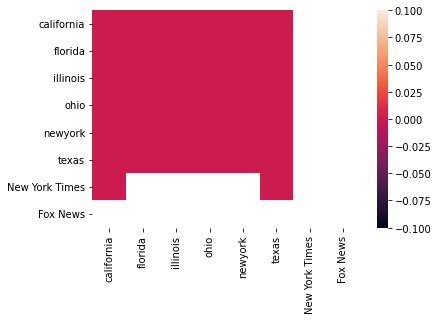

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(mtx, xticklabels=prefixes_new, yticklabels=prefixes_new)


In [65]:
for idx, comp in enumerate(nx.connected_components(G)):
    my_subgraph = G.subgraph(list(comp))
    nx.write_gexf(my_subgraph, "subgraph_{}.gexf".format(str(idx)))

In [135]:
outlet_to_scores = pickle.load(open('our_domains.pkl', 'rb'))

In [146]:
prefix_to_score = {pr: [] for pr in prefixes_new}
for outlet, val in outlet_to_scores.items():
    pr = domain_info.get('www.' + outlet, domain_info.get(outlet, domain_info.get(outlet[4:])))

    print(outlet)
    print(pr)
    if val != 0 and pr is not None:
        prefix_to_score[pr] = prefix_to_score[pr] + [val]

www.wbtai.com
newyork
www.independent.com
california
www.oberlinreview.org
ohio
www.pix11.com
newyork
www.nbclosangeles.com
california
www.houstonpublicmedia.org
texas
www.chicagodefender.com
illinois
www.lbpost.com
california
www.news4usonline.com
california
www.nbc4i.com
ohio
www.sgvtribune.com
california
www.irishexaminerusa.com
newyork
www.cincinnatimagazine.com
ohio
www.palmspringslife.com
california
www.1150wima.iheart.com
None
www.biscaynetimes.com
florida
www.jewishpress.com
newyork
www.dvcinquirer.com
california
www.kmjnow.com
california
www.berkeleyside.org
california
www.progressive.org
california
www.gardenavalleynews.org
california
www.dailyfreeman.com
newyork
www.enewspf.com
illinois
www.dailytrib.com
texas
www.eccunion.com
california
www.cityandstateny.com
newyork
www.nyc.streetsblog.org
california
www.tomdispatch.com
california
www.idyllwildtowncrier.com
california
www.sbsun.com
california
www.inlandvalleynews.com
california
www.wylienews.com
texas
www.mountvernonnews.c

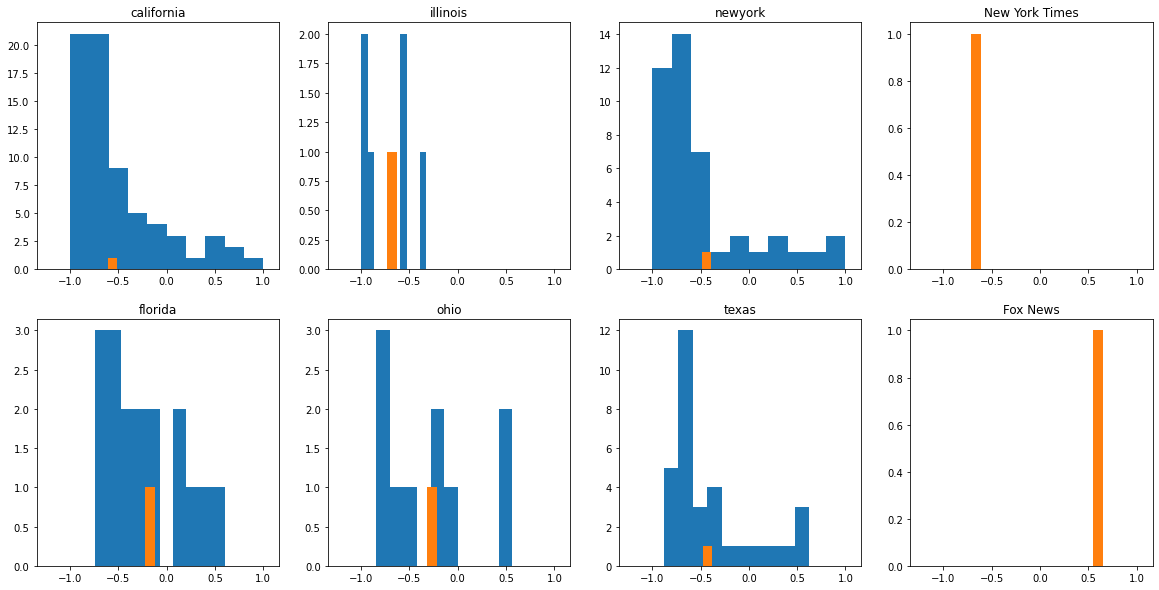

In [171]:
fig, ax = plt.subplots(2, 4 , sharex=True)
plt.rcParams["figure.figsize"] = (20,10)
idx = 0
for pr, k in prefix_to_score.items():
    k = [val for val in k if val == val]
    ax[idx % 2, int(idx / 2)].hist(k, label='distribution')
    ax[idx % 2, int(idx / 2)].set_title(pr)
    
    ax[idx % 2, int(idx / 2)].hist([np.mean(k)], label='mean value')
    ax[idx % 2, int(idx / 2)].tick_params(axis = 'both', labelbottom=True)
    idx += 1


In [134]:
'www.portisabelsouthpadre.com'[:4]

'www.'